# KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/Fish.csv')
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [3]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

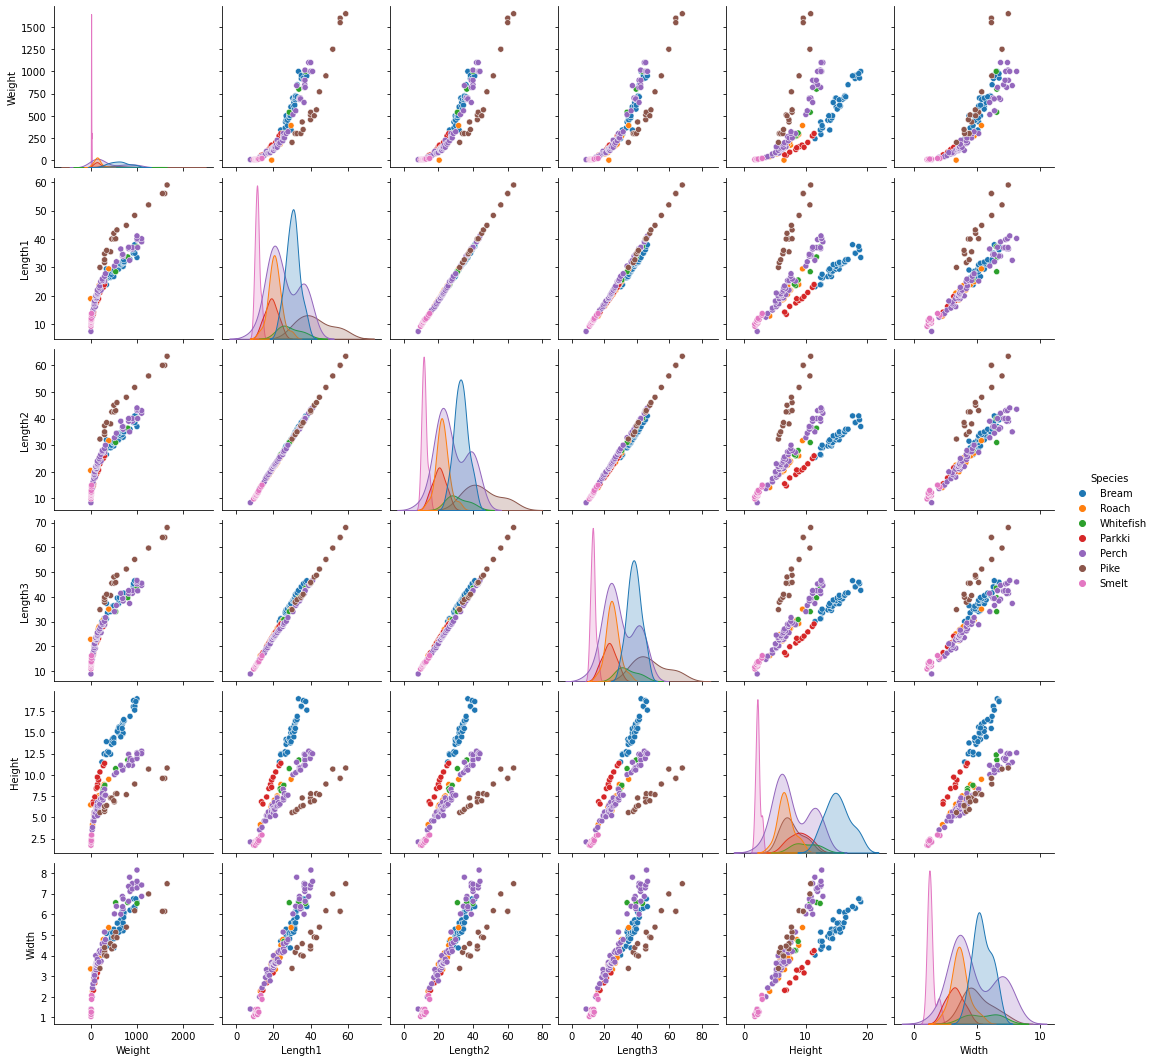

In [4]:
sns.pairplot(df,hue='Species',diag_kind='kde')

<AxesSubplot:xlabel='Species', ylabel='count'>

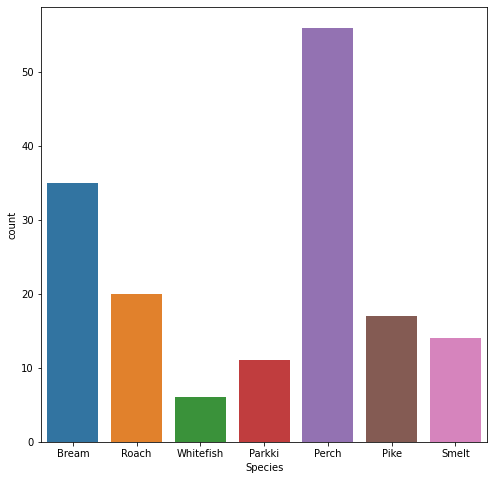

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(data = df,x='Species')

<AxesSubplot:>

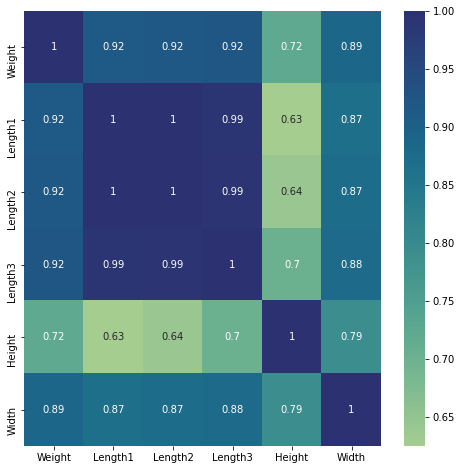

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap = 'crest')

<AxesSubplot:ylabel='Species'>

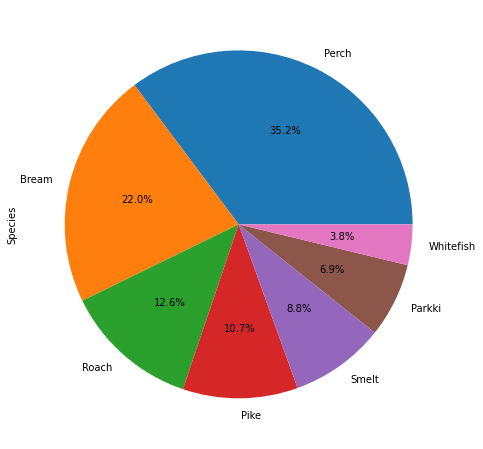

In [8]:
df['Species'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))

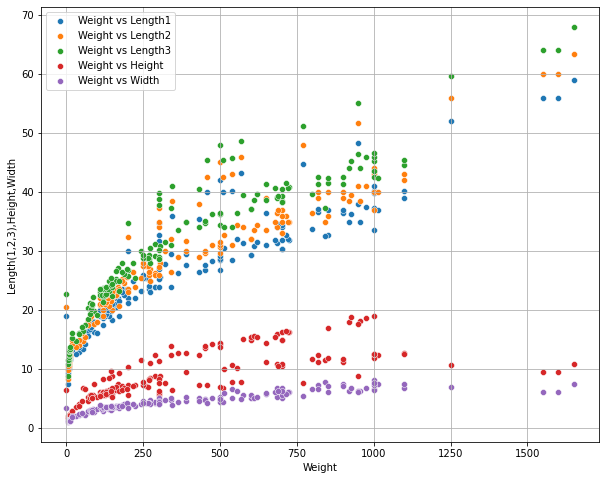

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Weight',y='Length1',data=df,label='Weight vs Length1')
sns.scatterplot(x='Weight',y='Length2',data=df,label='Weight vs Length2')
sns.scatterplot(x='Weight',y='Length3',data=df,label='Weight vs Length3')
sns.scatterplot(x='Weight',y='Height',data=df,label='Weight vs Height')
sns.scatterplot(x='Weight',y='Width',data=df,label='Weight vs Width')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Length(1,2,3),Height,Width')
plt.grid()
plt.show()

# Data Preprocessing

In [10]:
df1 = df.copy()
df1.head(5)

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [11]:
df1.drop(['Species'], axis=1,inplace= True)

In [12]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [13]:
y_pred = clf.fit_predict(df1)
y_pred

array([ 1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [14]:
X_scores = clf.negative_outlier_factor_
X_scores[0:10]

array([-1.04832716, -0.99467313, -1.0990037 , -1.20001084, -1.12203907,
       -1.08435597, -1.01925887, -1.32019576, -1.08428857, -1.01918105])

In [15]:
np.sort(X_scores)[0:20]

array([-3.5663789 , -3.34913279, -3.13327277, -1.90682414, -1.32426711,
       -1.32019576, -1.31951325, -1.31046972, -1.30437778, -1.26540731,
       -1.25769858, -1.25754451, -1.25742347, -1.2073562 , -1.20489736,
       -1.20001084, -1.19702489, -1.17923169, -1.16742038, -1.16415862])

In [16]:
threshold_value = np.sort(X_scores)[4]
threshold_value

-1.3242671052456159

In [17]:
Outlier_df= df[X_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

Species  Weight  Length1  Length2  Length3   Height   Width
141    Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849
142    Pike  1600.0     56.0     60.0     64.0   9.6000  6.1440
143    Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
144    Pike  1650.0     59.0     63.4     68.0  10.8120  7.4800

In [18]:
for i in indexs:
    df.drop(i, axis = 0,inplace = True)

In [19]:
df1


Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936
155    13.4     11.7     12.4     13.5   2.4300  1.2690
156    12.2     12.1     13.0     13.8   2.2770  1.2558
157    19.7     13.2     14.3     15.2   2.8728  2.0672
158    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]

In [20]:
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[155 rows x 7 columns]

In [21]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

lbe.fit_transform(df["Species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5])

In [22]:
df["Target"]=lbe.fit_transform(df["Species"])
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width  Target
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200       0
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056       0
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961       0
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555       0
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340       0

In [23]:
df.drop(['Species'],axis=1,inplace=True)

In [24]:
X=df.drop('Target',axis=1)
y=df['Target']

X.head()

Weight  Length1  Length2  Length3   Height   Width
0   242.0     23.2     25.4     30.0  11.5200  4.0200
1   290.0     24.0     26.3     31.2  12.4800  4.3056
2   340.0     23.9     26.5     31.1  12.3778  4.6961
3   363.0     26.3     29.0     33.5  12.7300  4.4555
4   430.0     26.5     29.0     34.0  12.4440  5.1340

In [25]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

Weight   Length1   Length2   Length3    Height     Width
0  0.220000  0.384804  0.392610  0.457883  0.568334  0.418978
1  0.263636  0.404412  0.413395  0.483801  0.624055  0.459235
2  0.309091  0.401961  0.418014  0.481641  0.618123  0.514279
3  0.330000  0.460784  0.475751  0.533477  0.638566  0.480365
4  0.390909  0.465686  0.475751  0.544276  0.621966  0.576004

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,  test_size=0.2, random_state=42)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (124, 6)
X_test (31, 6)
y_train (124,)
y_test (31,)


In [27]:
knn = KNeighborsClassifier(n_neighbors = 1,leaf_size=3)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(leaf_size=3, n_neighbors=1)

In [28]:
y_pred_knn = knn_model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_knn)

0.9032258064516129

In [30]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         2
           2       0.90      0.82      0.86        11
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.90        31
   macro avg       0.77      0.83      0.79        31
weighted avg       0.90      0.90      0.90        31



In [31]:
error_rate = []
for i in range(1,15):
    knn =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred1 = knn.predict(X_test)
    error_rate.append(np.mean(pred1 != y_test))

In [32]:
error_rate.index(min(error_rate))

7

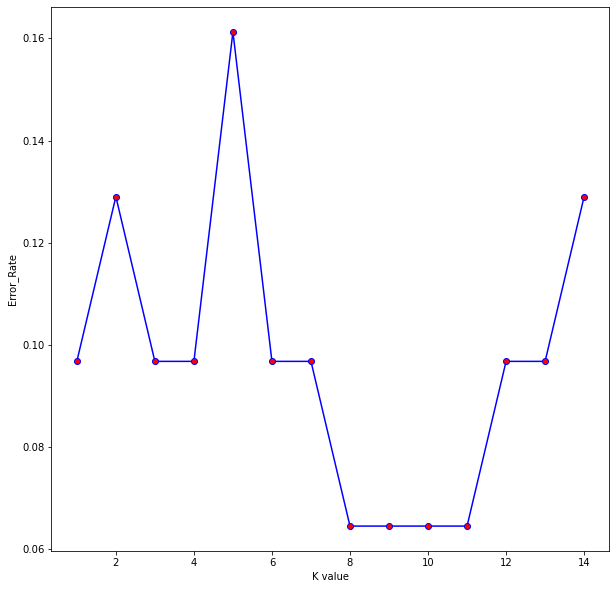

In [33]:
plt.figure(figsize=(10,10))
plt.plot(range(1,15),error_rate,color='blue',marker = 'o',markerfacecolor = 'red')
plt.xlabel('K value')
plt.ylabel('Error_Rate')
plt.show()

# Hyperparameter Tuning

 ## GRID SEARCH CV

In [34]:
knn2 = KNeighborsClassifier()
leaf_size = list(range(1,40))
n_neighbors = list(range(1,30))
p = [1,2]

In [36]:
param = {"leaf_size":leaf_size,"n_neighbors":n_neighbors,"p":p,}

In [37]:
clf = GridSearchCV(knn2,param,cv = 15,verbose = 5)

In [38]:
clf.fit(X_train,y_train)

Fitting 15 folds for each of 2262 candidates, totalling 33930 fits
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] .....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=2, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1 .................................
[CV] .

[CV] ..... leaf_size=1, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=1, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=1, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=5, p=1 .................................
[CV] .

[CV] ..... leaf_size=1, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=7, p=1, score=0.875, total=   0.0s
[CV] leaf_size=1, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=7, p=2 .................................
[CV] .

[CV] ..... leaf_size=1, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=2 .................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=12, p=2, score=0.889, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=2 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=15, p=1, score=0.375, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=15, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=17, p=1 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=1, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=20, p=1 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=22, p=1 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=2 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=26, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=1 ................................
[CV] .

[CV] .... leaf_size=1, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=1, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=28, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=1, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=28, p=1, score=0.750, total=   0.0s
[CV] leaf_size=1, n_neighbors=28, p=2 ................................
[CV] .

[CV] ..... leaf_size=2, n_neighbors=2, p=1, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=2, p=1 .................................
[CV] .

[CV] ..... leaf_size=2, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=2 .................................
[CV] .

[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=6, p=2 .................................
[CV] .

[CV] ..... leaf_size=2, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=8, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=8, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=8, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=8, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=8, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=8, p=1 .................................
[CV] ..... leaf_size=2, n_neighbors=8, p=1, score=0.875, total=   0.0s
[CV] leaf_size=2, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=2, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=2, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=2, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=2, n_neighbors=8, p=2 .................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=10, p=2, score=0.889, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=2 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.889, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=12, p=2 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=14, p=2, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=14, p=2 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=16, p=2, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=18, p=2, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=18, p=2, score=0.875, total=   0.0s
[CV] leaf_size=2, n_neighbors=19, p=1 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=2, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=2, n_neighbors=21, p=1 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=23, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=23, p=1, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=23, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=23, p=2, score=0.556, total=   0.0s
[CV] leaf_size=2, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=23, p=2 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=25, p=2, score=0.556, total=   0.0s
[CV] leaf_size=2, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=25, p=2, score=0.375, total=   0.0s
[CV] leaf_size=2, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=25, p=2 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=27, p=1, score=0.750, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.556, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.375, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=27, p=2 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=29, p=2, score=0.556, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=29, p=2, score=0.556, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=29, p=2, score=0.375, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=2 ................................
[CV] .

[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2 .................................
[CV] .

[CV] ..... leaf_size=3, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=3, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=3, n_neighbors=4, p=2 .................................
[CV] .

[CV] leaf_size=3, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=3, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=3, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] l

[CV] ..... leaf_size=3, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=3, n_neighbors=8, p=2, score=0.875, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=1, score=0.889, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=3, n_neighbors=9, p=1, score=0.778, total=   0.0s
[CV] leaf_size=3, n_neighbors=9, p=1 .................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=11, p=1, score=0.556, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=11, p=1, score=0.778, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=1 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=13, p=1 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=15, p=1, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=15, p=1 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=19, p=1, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=19, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=21, p=1, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=21, p=1, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=3, n_neighbors=21, p=1, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=21, p=2, score=0.556, total=   0.0s
[CV] leaf_size=3, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=21, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=2, score=0.556, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=2, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=25, p=2, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=25, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=27, p=2, score=0.375, total=   0.0s
[CV] leaf_size=3, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=27, p=2 ................................
[CV] .

[CV] .... leaf_size=3, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=3, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=2 ................................
[CV] .

[CV] ..... leaf_size=4, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=4, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=4, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=4, n_neighbors=2, p=2, score=1.000, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=4, n_neighbors=2, p=2, score=0.875, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=4, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=3, p=1, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=3, p=1 .................................
[CV] .

[CV] ..... leaf_size=4, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=4, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=4, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=1 .................................
[CV] .

[CV] ..... leaf_size=4, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=7, p=1, score=0.375, total=   0.0s
[CV] leaf_size=4, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=7, p=1 .................................
[CV] .

[CV] ..... leaf_size=4, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=4, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=4, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=4, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=9, p=1 .................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=13, p=1 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=16, p=1, score=0.778, total=   0.0s
[CV] leaf_size=4, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=16, p=1, score=0.556, total=   0.0s
[CV] leaf_size=4, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=4, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=16, p=1 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=18, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=18, p=2, score=0.875, total=   0.0s
[CV] leaf_size=4, n_neighbors=19, p=1 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=2, score=0.375, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=21, p=2 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=2 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2 ................................
[CV] .

[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=27, p=2 ................................
[CV] .

[CV] leaf_size=4, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=4, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] l

[CV] ..... leaf_size=5, n_neighbors=2, p=2, score=0.875, total=   0.0s
[CV] leaf_size=5, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=5, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=3, p=1, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=3, p=1, score=0.889, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=3, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1 .................................
[CV] .

[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=5, p=1 .................................
[CV] .

[CV] ..... leaf_size=5, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=7, p=1, score=0.375, total=   0.0s
[CV] leaf_size=5, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=7, p=1 .................................
[CV] .

[CV] ..... leaf_size=5, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=5, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=2 .................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=13, p=1, score=0.875, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=13, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=17, p=2, score=0.375, total=   0.0s
[CV] leaf_size=5, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=17, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.375, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=22, p=2, score=0.556, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=24, p=2, score=0.375, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=24, p=2, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=27, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=27, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=27, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=27, p=2, score=0.556, total=   0.0s
[CV] leaf_size=5, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=27, p=2 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=5, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=29, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=5, n_neighbors=29, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=29, p=1, score=0.750, total=   0.0s
[CV] leaf_size=5, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=29, p=2 ................................
[CV] .

[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=2, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=2 .................................
[CV] .

[CV] ..... leaf_size=6, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=4, p=1 .................................
[CV] ..... leaf_size=6, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=4, p=2 .................................
[CV] .

[CV] leaf_size=6, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=6, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=6, p=2, score=0.500, total=   0.0s
[CV] leaf_size=6, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] l

[CV] ..... leaf_size=6, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=8, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=8, p=2, score=0.500, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=6, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2 .................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=10, p=2, score=0.500, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=10, p=2 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=2 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=6, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=14, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=15, p=1, score=0.778, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=16, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=17, p=1, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=17, p=1, score=0.556, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=17, p=1, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=17, p=1, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=17, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=19, p=1, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=19, p=1, score=0.556, total=   0.0s
[CV] leaf_size=6, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=19, p=1, score=0.556, total=   0.0s
[CV] leaf_size=6, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=19, p=1, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=19, p=1, score=0.375, total=   0.0s
[CV] leaf_size=6, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=19, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=19, p=1, score=0.375, total=   0.0s
[CV] leaf_size=6, n_neighbors=19, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=21, p=1, score=0.375, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=21, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=21, p=1, score=0.375, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=21, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=21, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=23, p=1, score=0.375, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=1, score=0.375, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=23, p=1, score=0.500, total=   0.0s
[CV] leaf_size=6, n_neighbors=23, p=1 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=6, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=25, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=6, n_neighbors=25, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=25, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=25, p=2 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=27, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=27, p=1, score=0.500, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=1 ................................
[CV] .... leaf_size=6, n_neighbors=27, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=27, p=2, score=0.556, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2 ................................
[CV] .

[CV] .... leaf_size=6, n_neighbors=29, p=1, score=0.750, total=   0.0s
[CV] leaf_size=6, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=29, p=2, score=0.556, total=   0.0s
[CV] leaf_size=6, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=29, p=2, score=0.556, total=   0.0s
[CV] leaf_size=6, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=29, p=2, score=0.375, total=   0.0s
[CV] leaf_size=6, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=6, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=6, n_neighbors=29, p=2 ................................
[CV] .

[CV] ..... leaf_size=7, n_neighbors=2, p=2, score=0.889, total=   0.0s
[CV] leaf_size=7, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=2, p=2, score=0.778, total=   0.0s
[CV] leaf_size=7, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=2, p=2 .................................
[CV] .

[CV] leaf_size=7, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=4, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] l

[CV] ..... leaf_size=7, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=6, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=7, n_neighbors=6, p=2 .................................
[CV] .

[CV] ..... leaf_size=7, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=8, p=2 .................................
[CV] ..... leaf_size=7, n_neighbors=8, p=2, score=0.875, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=1, score=0.889, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=7, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=9, p=1 .................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=10, p=2, score=0.875, total=   0.0s
[CV] leaf_size=7, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=11, p=1, score=0.556, total=   0.0s
[CV] leaf_size=7, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=11, p=1, score=0.778, total=   0.0s
[CV] leaf_size=7, n_neighbors=11, p=1 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=13, p=1, score=0.556, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=15, p=1, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=15, p=1, score=0.250, total=   0.0s
[CV] leaf_size=7, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=15, p=1, score=0.375, total=   0.0s
[CV] leaf_size=7, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=15, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=15, p=1 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=17, p=1 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=19, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=19, p=1, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=2 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=21, p=1, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=21, p=1, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=21, p=1 ................................
[CV] .... leaf_size=7, n_neighbors=21, p=1, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=21, p=2, score=0.556, total=   0.0s
[CV] leaf_size=7, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=21, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=21, p=2 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=23, p=2, score=0.556, total=   0.0s
[CV] leaf_size=7, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=23, p=2, score=0.375, total=   0.0s
[CV] leaf_size=7, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=23, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=23, p=2 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=2, score=0.375, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=25, p=2 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2 ................................
[CV] .

[CV] .... leaf_size=7, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=7, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=7, n_neighbors=29, p=2 ................................
[CV] .... leaf_size=7, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=7, n_neighbors=29, p=2 ................................
[CV] .

[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=1.000, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.875, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=2 .................................
[CV] ..... leaf_size=8, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=3, p=1, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=3, p=1, score=0.889, total=   0.0s
[CV] leaf_size=8, n_neighbors=3, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=3, p=1 .................................
[CV] .

[CV] ..... leaf_size=8, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=5, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=5, p=1 .................................
[CV] .

[CV] ..... leaf_size=8, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=7, p=1, score=0.375, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=1 .................................
[CV] .

[CV] ..... leaf_size=8, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=8, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=9, p=1 .................................
[CV] ..... leaf_size=8, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=9, p=1 .................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=11, p=2 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=13, p=1, score=0.875, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=15, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=15, p=2 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=17, p=2, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=17, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=17, p=2 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2 ................................
[CV] .... leaf_size=8, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=8, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=8, n_neighbors=20, p=1 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=21, p=2, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=22, p=1, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=22, p=1, score=0.556, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=22, p=1, score=0.556, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=22, p=1, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=1 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=24, p=1, score=0.556, total=   0.0s
[CV] leaf_size=8, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=24, p=1, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=24, p=1, score=0.375, total=   0.0s
[CV] leaf_size=8, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=24, p=1, score=0.375, total=   0.0s
[CV] leaf_size=8, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=24, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=24, p=1 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=26, p=1, score=0.375, total=   0.0s
[CV] leaf_size=8, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=26, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=26, p=1 ................................
[CV] .

[CV] .... leaf_size=8, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=28, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=1 ................................
[CV] .... leaf_size=8, n_neighbors=28, p=1, score=0.750, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=2 ................................
[CV] .

[CV] ..... leaf_size=9, n_neighbors=1, p=1, score=0.875, total=   0.0s
[CV] leaf_size=9, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=9, n_neighbors=1, p=1, score=1.000, total=   0.0s
[CV] leaf_size=9, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=9, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=9, n_neighbors=1, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=9, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=9, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=1, p=2, score=0.778, total=   0.0s
[CV] leaf_size=9, n_neighbors=1, p=2 .................................
[CV] .

[CV] ..... leaf_size=9, n_neighbors=3, p=2, score=0.778, total=   0.0s
[CV] leaf_size=9, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=3, p=2, score=0.778, total=   0.0s
[CV] leaf_size=9, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=3, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=3, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=3, p=2 .................................
[CV] .

[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=2 .................................
[CV] .

[CV] ..... leaf_size=9, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=7, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=7, p=2, score=0.875, total=   0.0s
[CV] leaf_size=9, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=7, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=7, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=7, p=2, score=0.875, total=   0.0s
[CV] leaf_size=9, n_neighbors=8, p=1 .................................
[CV] ..... leaf_size=9, n_neighbors=8, p=1, score=0.889, total=   0.0s
[CV] leaf_size=9, n_neighbors=8, p=1 .................................
[CV] .

[CV] ..... leaf_size=9, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=9, p=2 .................................
[CV] ..... leaf_size=9, n_neighbors=9, p=2, score=0.875, total=   0.0s
[CV] leaf_size=9, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=10, p=1, score=0.778, total=   0.0s
[CV] leaf_size=9, n_neighbors=10, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=9, n_neighbors=10, p=1 ................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=12, p=1, score=0.778, total=   0.0s
[CV] leaf_size=9, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=12, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=12, p=1, score=0.375, total=   0.0s
[CV] leaf_size=9, n_neighbors=12, p=1 ................................
[CV] .

[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.375, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.375, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] l

[CV] .... leaf_size=9, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=16, p=1, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=16, p=1, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=16, p=1, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=16, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=16, p=1, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=16, p=1 ................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=18, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=18, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=18, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=18, p=1, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=18, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=18, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=18, p=1, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=18, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=18, p=2, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=18, p=2 ................................
[CV] .

[CV] leaf_size=9, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=1 ................................
[CV] .... leaf_size=9, n_neighbors=20, p=1, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=20, p=2, score=0.556, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=20, p=2, score=0.375, total=   0.0s
[CV] l

[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.556, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.375, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=22, p=2 ................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=24, p=2, score=0.375, total=   0.0s
[CV] leaf_size=9, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=24, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=24, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=24, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=24, p=2 ................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=26, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=26, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=26, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2 ................................
[CV] .

[CV] .... leaf_size=9, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=28, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=28, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=28, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=9, n_neighbors=28, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=28, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=28, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=9, n_neighbors=28, p=2 ................................
[CV] .... leaf_size=9, n_neighbors=28, p=2, score=0.750, total=   0.0s
[CV] leaf_size=9, n_neighbors=29, p=1 ................................
[CV] .

[CV] .... leaf_size=10, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=10, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=10, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=10, n_neighbors=1, p=2, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=2, p=1, score=0.778, total=   0.0s
[CV] leaf_size=10, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=2, p=1, score=0.889, total=   0.0s
[CV] leaf_size=10, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=2, p=1, score=0.889, total=   0.0s
[CV] leaf_size=10, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=2, p=1, score=0.778, total=   0.0s
[CV] leaf_size=10, n_neighbors=2, p=1 ................................
[CV] .

[CV] .... leaf_size=10, n_neighbors=4, p=1, score=0.778, total=   0.0s
[CV] leaf_size=10, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=4, p=1, score=0.778, total=   0.0s
[CV] leaf_size=10, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=4, p=1, score=0.778, total=   0.0s
[CV] leaf_size=10, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=4, p=1, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=4, p=1 ................................
[CV] .

[CV] .... leaf_size=10, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=6, p=1, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=1 ................................
[CV] .

[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=10, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=8, p=1 ................................
[CV] .

[CV] ... leaf_size=10, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=10, p=2, score=0.889, total=   0.0s
[CV] leaf_size=10, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=10, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=12, p=2, score=0.889, total=   0.0s
[CV] leaf_size=10, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=14, p=1, score=0.875, total=   0.0s
[CV] leaf_size=10, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=14, p=2, score=0.778, total=   0.0s
[CV] leaf_size=10, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=20, p=2, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=10, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=10, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=10, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=10, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=10, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=10, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=27, p=1 ...............................
[CV] .

[CV] ... leaf_size=10, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=10, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=10, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=10, n_neighbors=29, p=1 ...............................
[CV] .

[CV] .... leaf_size=11, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=2, p=2, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2 ................................
[CV] .

[CV] .... leaf_size=11, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=11, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=11, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=11, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=11, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=6, p=2, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=6, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=11, n_neighbors=8, p=2, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=8, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=11, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2 ................................
[CV] .

[CV] ... leaf_size=11, n_neighbors=10, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=13, p=1 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=11, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=11, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=15, p=1, score=0.778, total=   0.0s
[CV] leaf_size=11, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=15, p=1, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=15, p=1, score=0.556, total=   0.0s
[CV] leaf_size=11, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=17, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=22, p=2, score=0.556, total=   0.0s
[CV] leaf_size=11, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=22, p=2, score=0.375, total=   0.0s
[CV] leaf_size=11, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=24, p=2, score=0.375, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=24, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=27, p=1, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=1, score=0.750, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.556, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=27, p=2, score=0.375, total=   0.0s
[CV] leaf_size=11, n_neighbors=27, p=2 ...............................
[CV] .

[CV] ... leaf_size=11, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=29, p=2, score=0.556, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=29, p=2, score=0.556, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=29, p=2, score=0.375, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=11, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=2 ...............................
[CV] .

[CV] .... leaf_size=12, n_neighbors=2, p=2, score=0.889, total=   0.0s
[CV] leaf_size=12, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=2, p=2, score=0.778, total=   0.0s
[CV] leaf_size=12, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=2, p=2 ................................
[CV] .

[CV] .... leaf_size=12, n_neighbors=4, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=12, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=12, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=12, n_neighbors=7, p=1 ................................
[CV] .

[CV] .... leaf_size=12, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=12, n_neighbors=8, p=2, score=0.875, total=   0.0s
[CV] leaf_size=12, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=9, p=1, score=0.889, total=   0.0s
[CV] leaf_size=12, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=12, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=12, n_neighbors=10, p=2, score=0.875, total=   0.0s
[CV] leaf_size=12, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=11, p=1, score=0.556, total=   0.0s
[CV] leaf_size=12, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=11, p=1, score=0.778, total=   0.0s
[CV] leaf_size=12, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=12, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=13, p=1, score=0.556, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=15, p=1, score=0.250, total=   0.0s
[CV] leaf_size=12, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=15, p=1, score=0.375, total=   0.0s
[CV] leaf_size=12, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=19, p=1, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=12, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=21, p=1, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=21, p=2, score=0.556, total=   0.0s
[CV] leaf_size=12, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=21, p=2, score=0.375, total=   0.0s
[CV] leaf_size=12, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=23, p=2, score=0.556, total=   0.0s
[CV] leaf_size=12, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=23, p=2, score=0.375, total=   0.0s
[CV] leaf_size=12, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=25, p=2, score=0.375, total=   0.0s
[CV] leaf_size=12, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=25, p=2 ...............................
[CV] .

[CV] ... leaf_size=12, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=27, p=2 ...............................
[CV] .

[CV] leaf_size=12, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=12, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] l

[CV] .... leaf_size=13, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=2, p=2, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=2, p=2, score=0.875, total=   0.0s
[CV] leaf_size=13, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=3, p=1, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=3, p=1, score=0.889, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=13, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=13, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=13, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=13, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=5, p=1 ................................
[CV] .

[CV] leaf_size=13, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=7, p=1, score=0.375, total=   0.0s
[CV] leaf_size=13, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] l

[CV] .... leaf_size=13, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=13, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=13, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=13, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=13, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=13, p=1, score=0.875, total=   0.0s
[CV] leaf_size=13, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=15, p=1, score=0.875, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=15, p=2, score=0.778, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=17, p=2, score=0.375, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=19, p=2, score=0.375, total=   0.0s
[CV] leaf_size=13, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=21, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=24, p=1, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=24, p=1 ...............................
[CV] .

[CV] ... leaf_size=13, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=13, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=13, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=13, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=13, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=26, p=1 ...............................
[CV] .

[CV] leaf_size=13, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=13, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=13, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=13, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=28, p=1, score=0.375, total=   0.0s
[CV] leaf_size=13, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=13, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=13, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] l

[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.875, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=14, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=3, p=1, score=0.875, total=   0.0s
[CV] leaf_size=14, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=3, p=1, score=0.875, total=   0.0s
[CV] leaf_size=14, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=14, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=5, p=1, score=0.875, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=5, p=2, score=0.778, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=5, p=2, score=0.889, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2 ................................
[CV] .

[CV] .... leaf_size=14, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=7, p=2 ................................
[CV] .

[CV] .... leaf_size=14, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=14, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=14, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=14, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=14, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=17, p=2, score=0.375, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.375, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=21, p=2, score=0.375, total=   0.0s
[CV] leaf_size=14, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=24, p=1, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=24, p=1 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=14, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=14, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=14, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=26, p=1 ...............................
[CV] .

[CV] ... leaf_size=14, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=14, n_neighbors=28, p=2, score=0.750, total=   0.0s
[CV] leaf_size=14, n_neighbors=28, p=2 ...............................
[CV] .

[CV] leaf_size=15, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=2, p=1, score=0.500, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] l

[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.500, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] l

[CV] .... leaf_size=15, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=15, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=15, n_neighbors=8, p=2, score=0.875, total=   0.0s
[CV] leaf_size=15, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=15, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=9, p=1 ................................
[CV] .

[CV] leaf_size=15, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=10, p=2, score=0.875, total=   0.0s
[CV] leaf_size=15, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=11, p=1, score=0.556, total=   0.0s
[CV] leaf_size=15, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=11, p=1, score=0.778, total=   0.0s
[CV] leaf_size=15, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=15, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] l

[CV] ... leaf_size=15, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=15, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=14, p=1, score=0.778, total=   0.0s
[CV] leaf_size=15, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=14, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=14, p=1 ...............................
[CV] .

[CV] ... leaf_size=15, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.778, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.556, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=15, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=15, n_neighbors=20, p=2, score=0.500, total=   0.0s
[CV] leaf_size=15, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=15, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=15, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=15, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=15, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=25, p=2, score=0.375, total=   0.0s
[CV] leaf_size=15, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=15, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=25, p=2 ...............................
[CV] .

[CV] leaf_size=15, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=15, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=15, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=15, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=15, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=15, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] l

[CV] .... leaf_size=16, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=1, p=2, score=0.875, total=   0.0s
[CV] leaf_size=16, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=1, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=16, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=16, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=16, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=16, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=16, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=6, p=2, score=0.778, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=16, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=1, score=0.875, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=16, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=16, n_neighbors=8, p=2 ................................
[CV] .

[CV] ... leaf_size=16, n_neighbors=10, p=1, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=10, p=2, score=0.889, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=12, p=2, score=0.889, total=   0.0s
[CV] leaf_size=16, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=14, p=1, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=1, score=0.875, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.778, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=16, p=1, score=0.875, total=   0.0s
[CV] leaf_size=16, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=18, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=18, p=2, score=0.375, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=20, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=24, p=2, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=24, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=24, p=2, score=0.750, total=   0.0s
[CV] leaf_size=16, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.556, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.375, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=16, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=16, n_neighbors=27, p=2 ...............................
[CV] .

[CV] .... leaf_size=17, n_neighbors=1, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=17, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=17, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=1, p=2, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=17, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=17, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=17, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=17, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=7, p=1, score=0.375, total=   0.0s
[CV] leaf_size=17, n_neighbors=7, p=1 ................................
[CV] .

[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.889, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=17, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=17, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=17, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=1 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=1, score=0.875, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=2, score=0.778, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=17, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=19, p=2, score=0.375, total=   0.0s
[CV] leaf_size=17, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=21, p=2, score=0.556, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=2, score=0.375, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=25, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2 ...............................
[CV] .

[CV] ... leaf_size=17, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=17, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=17, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=17, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=17, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=2, p=2, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.875, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=3, p=1, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=18, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=18, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=18, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=18, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=18, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=18, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=7, p=1 ................................
[CV] .

[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=18, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=18, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=18, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=18, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=13, p=1, score=0.875, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=1, score=0.875, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.778, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=17, p=2, score=0.375, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=19, p=2, score=0.375, total=   0.0s
[CV] leaf_size=18, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.375, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=18, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=18, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=26, p=1 ...............................
[CV] .

[CV] leaf_size=18, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=28, p=1, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=18, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] l

[CV] ... leaf_size=18, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=18, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=18, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=18, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=19, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=19, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.889, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=19, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=19, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=7, p=1, score=0.875, total=   0.0s
[CV] leaf_size=19, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=7, p=1 ................................
[CV] .

[CV] .... leaf_size=19, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=19, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=19, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=19, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=17, p=2, score=0.375, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=19, p=2 ...............................
[CV] .

[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=21, p=2, score=0.750, total=   0.0s
[CV] l

[CV] ... leaf_size=19, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=24, p=1, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=24, p=1, score=0.556, total=   0.0s
[CV] leaf_size=19, n_neighbors=24, p=1 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=19, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=19, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=19, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=19, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=26, p=1 ...............................
[CV] .

[CV] ... leaf_size=19, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=19, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=19, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=19, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=28, p=1, score=0.375, total=   0.0s
[CV] leaf_size=19, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=19, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=19, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=19, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=20, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=1, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=1, p=1, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=1, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=2, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=2 ................................
[CV] .

[CV] .... leaf_size=20, n_neighbors=7, p=1, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=20, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=20, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=7, p=2 ................................
[CV] .

[CV] .... leaf_size=20, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=11, p=2, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=20, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=14, p=1, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=14, p=1, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=14, p=1, score=0.556, total=   0.0s
[CV] leaf_size=20, n_neighbors=14, p=1 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=16, p=1, score=0.778, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=16, p=1, score=0.556, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=16, p=1, score=0.375, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=20, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=22, p=1 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=24, p=2, score=0.556, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=26, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=26, p=2, score=0.556, total=   0.0s
[CV] leaf_size=20, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] leaf_size=20, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=20, n_neighbors=26, p=2 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=28, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=20, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=20, n_neighbors=28, p=1, score=0.750, total=   0.0s
[CV] leaf_size=20, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=28, p=2, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=28, p=2, score=0.556, total=   0.0s
[CV] leaf_size=20, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=28, p=2, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=20, n_neighbors=28, p=2, score=0.556, total=   0.0s
[CV] leaf_size=20, n_neighbors=28, p=2 ...............................
[CV] .

[CV] .... leaf_size=21, n_neighbors=1, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=1, p=1, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=1, p=1, score=1.000, total=   0.0s
[CV] leaf_size=21, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=1, p=1, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=21, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=21, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=2, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=3, p=2, score=0.889, total=   0.0s
[CV] leaf_size=21, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=21, n_neighbors=5, p=1, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=21, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=5, p=2, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=5, p=2, score=0.889, total=   0.0s
[CV] leaf_size=21, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=5, p=2, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=5, p=2, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=5, p=2 ................................
[CV] .

[CV] .... leaf_size=21, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=21, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=21, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=7, p=2 ................................
[CV] .

[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=21, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=21, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=11, p=2, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=11, p=2, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=12, p=1, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=14, p=1, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=14, p=1, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=14, p=1, score=0.556, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=16, p=1, score=0.778, total=   0.0s
[CV] leaf_size=21, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=16, p=1, score=0.556, total=   0.0s
[CV] leaf_size=21, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=16, p=1, score=0.375, total=   0.0s
[CV] leaf_size=21, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=21, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=21, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=21, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=21, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=21, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=21, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=21, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=25, p=2, score=0.556, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=25, p=2, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=25, p=2, score=0.375, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=21, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2 ...............................
[CV] .

[CV] ... leaf_size=21, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=21, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=21, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=21, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=22, n_neighbors=1, p=1, score=0.500, total=   0.1s
[CV] leaf_size=22, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=22, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=22, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=1, p=2, score=0.778, total=   0.0s
[CV] leaf_size=22, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=22, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=22, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=4, p=1, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=1 ................................
[CV] .

[CV] leaf_size=22, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=22, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=22, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] l

[CV] .... leaf_size=22, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=22, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=22, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=12, p=1, score=0.375, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=14, p=2, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=22, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=2, score=0.375, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=25, p=1, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=22, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=22, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=22, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=22, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=22, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=28, p=1, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=22, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=22, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=22, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=23, n_neighbors=1, p=1, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=23, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=23, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=1, p=2, score=0.778, total=   0.0s
[CV] leaf_size=23, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=23, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=23, n_neighbors=4, p=1, score=0.778, total=   0.0s
[CV] leaf_size=23, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=4, p=1, score=0.778, total=   0.0s
[CV] leaf_size=23, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=4, p=1, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=4, p=1 ................................
[CV] .

[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=23, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=23, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=23, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=23, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=23, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=23, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.375, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=14, p=2, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=23, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=23, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=23, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=23, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=22, p=2, score=0.375, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=23, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=25, p=1, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=23, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=23, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=23, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=28, p=1, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=23, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=23, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=24, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=1, p=2, score=0.778, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2 ................................
[CV] .

[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=4, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] l

[CV] .... leaf_size=24, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=24, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=24, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=24, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=24, n_neighbors=7, p=1 ................................
[CV] .

[CV] .... leaf_size=24, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=24, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=24, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=24, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=24, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=24, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=24, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.375, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=24, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=20, p=1, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.375, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=24, p=1 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=24, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=24, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=27, p=1 ...............................
[CV] .

[CV] ... leaf_size=24, n_neighbors=29, p=1, score=0.556, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=1, score=0.375, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=24, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=24, n_neighbors=29, p=1 ...............................
[CV] .

[CV] .... leaf_size=25, n_neighbors=2, p=1, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] leaf_size=25, n_neighbors=2, p=1 ................................
[CV] .

[CV] .... leaf_size=25, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=4, p=1 ................................
[CV] .

[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=2, score=0.778, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=25, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=25, n_neighbors=8, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=25, n_neighbors=8, p=1, score=0.875, total=   0.0s
[CV] leaf_size=25, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=25, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=25, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=25, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=25, n_neighbors=8, p=2, score=0.778, total=   0.0s
[CV] leaf_size=25, n_neighbors=8, p=2 ................................
[CV] .

[CV] ... leaf_size=25, n_neighbors=10, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=10, p=2, score=0.889, total=   0.0s
[CV] leaf_size=25, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=25, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=25, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=25, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=14, p=2, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=16, p=2, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=18, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=18, p=2, score=0.875, total=   0.0s
[CV] leaf_size=25, n_neighbors=19, p=1 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=25, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=23, p=1, score=0.375, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=25, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=25, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=25, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=1 ...............................
[CV] .

[CV] ... leaf_size=25, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=25, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=29, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=25, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=25, n_neighbors=29, p=1, score=0.750, total=   0.0s
[CV] leaf_size=25, n_neighbors=29, p=2 ...............................
[CV] .

[CV] .... leaf_size=26, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=2, p=2, score=0.778, total=   0.0s
[CV] leaf_size=26, n_neighbors=2, p=2 ................................
[CV] .

[CV] .... leaf_size=26, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=26, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=6, p=2, score=0.778, total=   0.0s
[CV] leaf_size=26, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=26, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=26, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=26, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=26, n_neighbors=8, p=1, score=0.875, total=   0.0s
[CV] leaf_size=26, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=26, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=26, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=8, p=2, score=0.889, total=   0.0s
[CV] leaf_size=26, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=8, p=2, score=0.778, total=   0.0s
[CV] leaf_size=26, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=26, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=8, p=2 ................................
[CV] .

[CV] ... leaf_size=26, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=26, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=26, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=10, p=2, score=0.778, total=   0.0s
[CV] leaf_size=26, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=10, p=2, score=0.500, total=   0.0s
[CV] leaf_size=26, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=10, p=2 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=12, p=2, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=14, p=2, score=0.500, total=   0.0s
[CV] leaf_size=26, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=26, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=18, p=2, score=0.750, total=   0.0s
[CV] leaf_size=26, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=26, n_neighbors=18, p=2, score=0.875, total=   0.0s
[CV] leaf_size=26, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=19, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=19, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=19, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=19, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=19, p=1 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=21, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=23, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=23, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=27, p=1 ...............................
[CV] .

[CV] ... leaf_size=26, n_neighbors=29, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=29, p=1, score=0.556, total=   0.0s
[CV] leaf_size=26, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=29, p=1, score=0.375, total=   0.0s
[CV] leaf_size=26, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=26, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=26, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=26, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=26, n_neighbors=29, p=1 ...............................
[CV] .

[CV] .... leaf_size=27, n_neighbors=2, p=1, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=2, p=1, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=1 ................................
[CV] .

[CV] .... leaf_size=27, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=4, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=27, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=27, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=27, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=6, p=2, score=0.778, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=27, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=8, p=2, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=27, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=8, p=2 ................................
[CV] .

[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=2 ...............................
[CV] .

[CV] leaf_size=27, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] l

[CV] ... leaf_size=27, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=27, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=27, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=15, p=1, score=0.778, total=   0.0s
[CV] leaf_size=27, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=15, p=1, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=15, p=1, score=0.556, total=   0.0s
[CV] leaf_size=27, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=20, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=20, p=2, score=0.556, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=20, p=2, score=0.375, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=2, score=0.556, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=27, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=24, p=2, score=0.556, total=   0.0s
[CV] leaf_size=27, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=27, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=27, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=27, p=1, score=0.500, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=27, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=1 ...............................
[CV] .

[CV] .... leaf_size=28, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=28, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=28, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=28, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=3, p=1, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.875, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=28, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=28, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=28, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=7, p=2, score=0.889, total=   0.0s
[CV] leaf_size=28, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=7, p=2, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=7, p=2 ................................
[CV] .

[CV] .... leaf_size=28, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=28, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=16, p=1, score=0.778, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=16, p=1, score=0.556, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=17, p=2, score=0.875, total=   0.0s
[CV] leaf_size=28, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=28, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=28, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=28, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=28, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=28, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=21, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=2 ...............................
[CV] .

[CV] ... leaf_size=28, n_neighbors=28, p=2, score=0.375, total=   0.0s
[CV] leaf_size=28, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=28, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=28, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=28, n_neighbors=28, p=2 ...............................
[CV] .

[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.875, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=29, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=3, p=2, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=3, p=2, score=0.875, total=   0.0s
[CV] leaf_size=29, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=3, p=2, score=0.875, total=   0.0s
[CV] leaf_size=29, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=4, p=1 ................................
[CV] .

[CV] .... leaf_size=29, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=5, p=2, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=29, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=29, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=6, p=1, score=0.889, total=   0.0s
[CV] leaf_size=29, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=6, p=1, score=0.778, total=   0.0s
[CV] leaf_size=29, n_neighbors=6, p=1 ................................
[CV] .

[CV] .... leaf_size=29, n_neighbors=7, p=2, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=29, n_neighbors=7, p=2, score=0.875, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=1, score=0.889, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=29, n_neighbors=8, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=8, p=1 ................................
[CV] .

[CV] .... leaf_size=29, n_neighbors=9, p=2, score=0.875, total=   0.0s
[CV] leaf_size=29, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=10, p=1, score=0.778, total=   0.0s
[CV] leaf_size=29, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=10, p=1 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=12, p=1, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=14, p=1, score=0.778, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=1, score=0.556, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=1, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=1, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=14, p=1, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=14, p=1 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=16, p=1, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=16, p=1, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=16, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=16, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=18, p=1, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=20, p=1, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=20, p=1, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=20, p=2 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=29, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=29, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=22, p=2, score=0.556, total=   0.0s
[CV] leaf_size=29, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=24, p=2, score=0.556, total=   0.0s
[CV] leaf_size=29, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=24, p=2, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=24, p=2, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=29, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=26, p=2, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=26, p=2, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=26, p=2 ...............................
[CV] .

[CV] leaf_size=29, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=2, score=0.375, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=29, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] l

[CV] .... leaf_size=30, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=1, p=2, score=0.778, total=   0.0s
[CV] leaf_size=30, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=30, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=1, p=2, score=0.875, total=   0.0s
[CV] leaf_size=30, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.778, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=30, n_neighbors=5, p=2, score=0.778, total=   0.0s
[CV] leaf_size=30, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=5, p=2, score=0.778, total=   0.0s
[CV] leaf_size=30, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=30, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=5, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=5, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=5, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=5, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=5, p=2 ................................
[CV] .

[CV] .... leaf_size=30, n_neighbors=7, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=2, score=0.875, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=2 ................................
[CV] .

[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=30, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=12, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=12, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=12, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=12, p=2 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=14, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=30, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=18, p=2, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=18, p=2, score=0.875, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=19, p=1, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=19, p=1, score=0.556, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=19, p=1, score=0.556, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=19, p=1, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=1 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=30, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=21, p=1, score=0.556, total=   0.0s
[CV] leaf_size=30, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=21, p=1, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=21, p=1, score=0.375, total=   0.0s
[CV] leaf_size=30, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=21, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=21, p=1, score=0.375, total=   0.0s
[CV] leaf_size=30, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=23, p=1, score=0.375, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=23, p=1, score=0.375, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=23, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=23, p=1, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=25, p=1, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=25, p=1, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=27, p=1, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=27, p=1, score=0.750, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=27, p=2, score=0.556, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=27, p=2, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=27, p=2, score=0.375, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=2 ...............................
[CV] .

[CV] leaf_size=30, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=29, p=2, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=29, p=2, score=0.556, total=   0.0s
[CV] leaf_size=30, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=29, p=2, score=0.375, total=   0.0s
[CV] leaf_size=30, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=30, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=30, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] l

[CV] .... leaf_size=31, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=2, p=2, score=1.000, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=2 ................................
[CV] .

[CV] .... leaf_size=31, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=31, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=31, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=31, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=31, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=7, p=1 ................................
[CV] .

[CV] .... leaf_size=31, n_neighbors=9, p=1, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=9, p=1, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=9, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=31, n_neighbors=9, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=11, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=13, p=1, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=13, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=13, p=1, score=0.875, total=   0.0s
[CV] leaf_size=31, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=13, p=2, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=13, p=2, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=15, p=1, score=0.875, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=15, p=2, score=0.778, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=15, p=2, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=15, p=2, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=17, p=2 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=31, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=31, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=31, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=22, p=1, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=22, p=1, score=0.556, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=22, p=1, score=0.556, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=22, p=1, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=24, p=1, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=24, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=24, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=1 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=31, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=26, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=26, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=26, p=1 ...............................
[CV] .

[CV] ... leaf_size=31, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=31, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=31, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=28, p=1, score=0.375, total=   0.0s
[CV] leaf_size=31, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=31, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=31, n_neighbors=28, p=1, score=0.625, total=   0.0s
[CV] leaf_size=31, n_neighbors=28, p=1 ...............................
[CV] .

[CV] .... leaf_size=32, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=1, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=1, p=1, score=0.875, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=32, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=3, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=32, n_neighbors=6, p=1, score=0.889, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=6, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=6, p=1, score=0.889, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=6, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=6, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=6, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=6, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=1 ................................
[CV] .

[CV] .... leaf_size=32, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=8, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=8, p=1, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=32, n_neighbors=8, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=8, p=1 ................................
[CV] .

[CV] ... leaf_size=32, n_neighbors=10, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=10, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=10, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=14, p=2, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=14, p=2, score=0.875, total=   0.0s
[CV] leaf_size=32, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=15, p=1, score=0.778, total=   0.0s
[CV] leaf_size=32, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=15, p=1, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=15, p=1, score=0.556, total=   0.0s
[CV] leaf_size=32, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=17, p=2, score=0.875, total=   0.0s
[CV] leaf_size=32, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=20, p=1, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=20, p=2, score=0.556, total=   0.0s
[CV] leaf_size=32, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=20, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=20, p=2, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=20, p=2 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=22, p=2, score=0.556, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=22, p=2, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=22, p=2, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.556, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=24, p=2, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=32, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1 ...............................
[CV] .

[CV] ... leaf_size=32, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=29, p=2, score=0.500, total=   0.0s
[CV] leaf_size=32, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=32, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=32, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=32, n_neighbors=29, p=2 ...............................
[CV] .

[CV] .... leaf_size=33, n_neighbors=2, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=2, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=2, p=2, score=1.000, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=2, p=2, score=0.875, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=2, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=3, p=1, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=33, n_neighbors=3, p=1, score=0.889, total=   0.0s
[CV] leaf_size=33, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=33, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=33, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=4, p=2, score=0.875, total=   0.0s
[CV] leaf_size=33, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=4, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=33, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=6, p=2, score=0.875, total=   0.0s
[CV] leaf_size=33, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=33, n_neighbors=9, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=33, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=11, p=2, score=0.875, total=   0.0s
[CV] leaf_size=33, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=11, p=2, score=0.875, total=   0.0s
[CV] leaf_size=33, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=14, p=1, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=14, p=1 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=16, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=17, p=1, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=17, p=1, score=0.556, total=   0.0s
[CV] leaf_size=33, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=17, p=1, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=17, p=1, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=17, p=1, score=0.375, total=   0.0s
[CV] leaf_size=33, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=19, p=2, score=0.375, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=19, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=19, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.375, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=21, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=23, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=26, p=1, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=26, p=1, score=0.556, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=1 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=33, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=28, p=1, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=33, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=33, n_neighbors=28, p=1, score=0.556, total=   0.0s
[CV] leaf_size=33, n_neighbors=28, p=1 ...............................
[CV] .

[CV] ... leaf_size=33, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=33, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=33, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=1, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=1 ................................
[CV] .

[CV] .... leaf_size=34, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=34, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=5, p=1, score=0.875, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=34, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=7, p=1, score=0.875, total=   0.0s
[CV] leaf_size=34, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=7, p=2 ................................
[CV] .

[CV] .... leaf_size=34, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=34, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=34, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=34, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=34, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=34, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=34, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=34, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=34, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=34, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=34, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=34, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=1 ...............................
[CV] .

[CV] leaf_size=34, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=34, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] l

[CV] ... leaf_size=34, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=24, p=2, score=0.556, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2 ...............................
[CV] .

[CV] leaf_size=34, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=34, n_neighbors=26, p=1, score=0.750, total=   0.0s
[CV] leaf_size=34, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=26, p=2, score=0.556, total=   0.0s
[CV] leaf_size=34, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] l

[CV] ... leaf_size=34, n_neighbors=28, p=2, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=28, p=2, score=0.556, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=28, p=2, score=0.375, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=34, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2 ...............................
[CV] .

[CV] .... leaf_size=35, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=1, p=2, score=0.875, total=   0.0s
[CV] leaf_size=35, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=35, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=1, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=35, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=3, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=3, p=2, score=0.875, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=3, p=2, score=0.875, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=4, p=1, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=4, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=4, p=1, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=4, p=1 ................................
[CV] .

[CV] .... leaf_size=35, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=35, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=35, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=35, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.889, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.889, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=6, p=1, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=6, p=1 ................................
[CV] .

[CV] .... leaf_size=35, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=8, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=8, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=8, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=35, n_neighbors=8, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=8, p=1 ................................
[CV] .

[CV] ... leaf_size=35, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=10, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=10, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=10, p=1 ...............................
[CV] .

[CV] leaf_size=35, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=12, p=1, score=0.750, total=   0.0s
[CV] l

[CV] ... leaf_size=35, n_neighbors=14, p=1, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=14, p=1, score=0.875, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=14, p=2, score=0.778, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=14, p=2, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=16, p=2, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=20, p=2, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=35, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=35, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=35, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=35, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=27, p=1 ...............................
[CV] .

[CV] ... leaf_size=35, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=35, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=35, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=35, n_neighbors=29, p=1, score=0.750, total=   0.0s
[CV] leaf_size=35, n_neighbors=29, p=1 ...............................
[CV] .

[CV] .... leaf_size=36, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=36, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=2, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=2, p=2, score=0.778, total=   0.0s
[CV] leaf_size=36, n_neighbors=2, p=2 ................................
[CV] .

[CV] .... leaf_size=36, n_neighbors=4, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=36, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=36, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=36, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=4, p=2, score=0.778, total=   0.0s
[CV] leaf_size=36, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=4, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=4, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=4, p=2 ................................
[CV] .

[CV] .... leaf_size=36, n_neighbors=6, p=2, score=0.889, total=   0.0s
[CV] leaf_size=36, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=6, p=2, score=0.778, total=   0.0s
[CV] leaf_size=36, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=6, p=2, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=6, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=6, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=6, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=6, p=2 ................................
[CV] .

[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .... leaf_size=36, n_neighbors=8, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=8, p=2 ................................
[CV] .

[CV] ... leaf_size=36, n_neighbors=10, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=10, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=10, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=10, p=2, score=0.875, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=1, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=1, score=0.556, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=12, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=13, p=1, score=0.556, total=   0.0s
[CV] leaf_size=36, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=13, p=1, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=13, p=1, score=0.375, total=   0.0s
[CV] leaf_size=36, n_neighbors=13, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=13, p=1, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=13, p=1 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=15, p=1, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=15, p=1, score=0.250, total=   0.0s
[CV] leaf_size=36, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=15, p=1, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=15, p=1, score=0.375, total=   0.0s
[CV] leaf_size=36, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=15, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=15, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=15, p=1 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=17, p=1, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=17, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=17, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=17, p=1, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=17, p=1 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=19, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=19, p=1, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=19, p=1, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=19, p=1, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=19, p=2, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=2 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=21, p=1, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=21, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=21, p=1, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=21, p=2, score=0.556, total=   0.0s
[CV] leaf_size=36, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=21, p=2, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=21, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=21, p=2, score=0.375, total=   0.0s
[CV] leaf_size=36, n_neighbors=21, p=2 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=23, p=2, score=0.556, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=23, p=2, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=23, p=2, score=0.375, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=23, p=2, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=23, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=2 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=25, p=2, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=25, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=25, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=25, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=25, p=2 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=27, p=2, score=0.500, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=27, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=27, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=27, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=28, p=1 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=36, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=29, p=2, score=0.625, total=   0.0s
[CV] leaf_size=36, n_neighbors=29, p=2 ...............................
[CV] ... leaf_size=36, n_neighbors=29, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=1, p=1, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=1, p=1, score=0.889, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1 ................................
[CV] .

[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.889, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=3, p=1, score=0.750, total=   0.0s
[CV] l

[CV] .... leaf_size=37, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=37, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=7, p=1, score=0.875, total=   0.0s
[CV] leaf_size=37, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=7, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=7, p=2 ................................
[CV] .

[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=2, score=0.889, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=37, n_neighbors=9, p=2, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=37, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=11, p=2, score=0.778, total=   0.0s
[CV] leaf_size=37, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=13, p=2, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=2 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=17, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=17, p=2, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=17, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=17, p=2, score=0.875, total=   0.0s
[CV] leaf_size=37, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=37, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=37, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=19, p=2, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=37, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=20, p=1, score=0.556, total=   0.0s
[CV] leaf_size=37, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=20, p=1, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=37, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=22, p=1, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=22, p=1, score=0.375, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=24, p=1, score=0.375, total=   0.0s
[CV] leaf_size=37, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=24, p=1 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=26, p=1, score=0.625, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=26, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=26, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=26, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=26, p=2, score=0.556, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2 ...............................
[CV] .

[CV] ... leaf_size=37, n_neighbors=28, p=1, score=0.500, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=1 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=1, score=0.750, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=2, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=2, score=0.556, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=2, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=2, score=0.556, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=37, n_neighbors=28, p=2, score=0.375, total=   0.0s
[CV] leaf_size=37, n_neighbors=28, p=2 ...............................
[CV] .

[CV] .... leaf_size=38, n_neighbors=1, p=2, score=0.778, total=   0.0s
[CV] leaf_size=38, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=1, p=2, score=0.889, total=   0.0s
[CV] leaf_size=38, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=1, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=1, p=2, score=0.875, total=   0.0s
[CV] leaf_size=38, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=1, p=2, score=1.000, total=   0.0s
[CV] leaf_size=38, n_neighbors=1, p=2 ................................
[CV] .

[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=3, p=2, score=0.875, total=   0.0s
[CV] leaf_size=38, n_neighbors=3, p=2 ................................
[CV] .

[CV] .... leaf_size=38, n_neighbors=5, p=2, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=5, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=38, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] leaf_size=38, n_neighbors=5, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=5, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=6, p=1 ................................
[CV] .

[CV] .... leaf_size=38, n_neighbors=7, p=2, score=0.875, total=   0.0s
[CV] leaf_size=38, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=7, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=7, p=2 ................................
[CV] .... leaf_size=38, n_neighbors=7, p=2, score=0.875, total=   0.0s
[CV] leaf_size=38, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=8, p=1, score=0.889, total=   0.0s
[CV] leaf_size=38, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=38, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=38, n_neighbors=8, p=1 ................................
[CV] .... leaf_size=38, n_neighbors=8, p=1, score=0.778, total=   0.0s
[CV] leaf_size=38, n_neighbors=8, p=1 ................................
[CV] .

[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.778, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.375, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=10, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=12, p=1, score=0.375, total=   0.0s
[CV] leaf_size=38, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=12, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=12, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=12, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=12, p=1 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=14, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=14, p=1, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=14, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=14, p=1, score=0.875, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=14, p=2, score=0.778, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=2 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=16, p=2, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=16, p=2, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=16, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=16, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=16, p=2 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=18, p=2, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=18, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=18, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=18, p=2 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=20, p=2, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=20, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=20, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=20, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=21, p=1 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=22, p=2, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=38, n_neighbors=22, p=2, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.556, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=23, p=1, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=38, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=25, p=1, score=0.556, total=   0.0s
[CV] leaf_size=38, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=25, p=1, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=38, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=25, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=25, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=25, p=1, score=0.375, total=   0.0s
[CV] leaf_size=38, n_neighbors=25, p=1 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=27, p=1, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=27, p=1, score=0.375, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=27, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=1 ...............................
[CV] .

[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.625, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.750, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] ... leaf_size=38, n_neighbors=29, p=1, score=0.500, total=   0.0s
[CV] leaf_size=38, n_neighbors=29, p=1 ...............................
[CV] .

[CV] .... leaf_size=39, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=2, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=2, p=1, score=1.000, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=2, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=1 ................................
[CV] .

[CV] leaf_size=39, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=5, p=1, score=0.500, total=   0.0s
[CV] l

[CV] .... leaf_size=39, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=7, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=7, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=7, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1 ................................
[CV] .... leaf_size=39, n_neighbors=7, p=1, score=0.375, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1 ................................
[CV] .

[CV] .... leaf_size=39, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=9, p=2, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=9, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=9, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=9, p=2 ................................
[CV] .... leaf_size=39, n_neighbors=9, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=9, p=2 ................................
[CV] .

[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=11, p=2, score=0.875, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=13, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=39, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=13, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=13, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=13, p=2, score=0.875, total=   0.0s
[CV] leaf_size=39, n_neighbors=14, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=14, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=14, p=1 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=15, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=15, p=2, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=16, p=1, score=0.778, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=16, p=1, score=0.556, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=16, p=1, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=16, p=1, score=0.375, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.556, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.375, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=18, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=18, p=1 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=20, p=1, score=0.375, total=   0.0s
[CV] leaf_size=39, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=20, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=20, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=20, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=20, p=1 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=22, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=22, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=22, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=22, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=22, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=22, p=2, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=22, p=2 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=24, p=1, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=1, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=1 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.556, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=24, p=2, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=24, p=2 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=26, p=1, score=0.750, total=   0.0s
[CV] leaf_size=39, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=26, p=2, score=0.556, total=   0.0s
[CV] leaf_size=39, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=26, p=2, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=26, p=2, score=0.375, total=   0.0s
[CV] leaf_size=39, n_neighbors=26, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=26, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=26, p=2 ...............................
[CV] .

[CV] ... leaf_size=39, n_neighbors=28, p=2, score=0.556, total=   0.0s
[CV] leaf_size=39, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=28, p=2, score=0.375, total=   0.0s
[CV] leaf_size=39, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=28, p=2, score=0.500, total=   0.0s
[CV] leaf_size=39, n_neighbors=28, p=2 ...............................
[CV] ... leaf_size=39, n_neighbors=28, p=2, score=0.625, total=   0.0s
[CV] leaf_size=39, n_neighbors=28, p=2 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 33930 out of 33930 | elapsed:  3.5min finished


GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             verbose=5)

In [39]:
clf.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [40]:
knn3 = KNeighborsClassifier(leaf_size=1,n_neighbors=1)

In [41]:
knn3.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [42]:
pred2 = knn.predict(X_test)

In [43]:
knn3.score(X_test,y_test)

0.9032258064516129

In [44]:
accuracy_score(y_test, pred2)

0.8709677419354839

## RANDOM SEARCH CV

In [45]:
knn_random = RandomizedSearchCV(estimator = knn2, param_distributions = param,
                                scoring='neg_mean_squared_error', n_iter = 10, cv = 5,
                                verbose=2, random_state=42, n_jobs = -1)

In [46]:
knn_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
knn_random.best_estimator_

KNeighborsClassifier(leaf_size=9, n_neighbors=2, p=1)

In [48]:
knn2.set_params(leaf_size=9, n_neighbors=2, p=1)

KNeighborsClassifier(leaf_size=9, n_neighbors=2, p=1)

In [49]:
knn2.fit(X_train,y_train)
pred3 = knn.predict(X_test)

In [50]:
accuracy_score(y_test, pred3)

0.8709677419354839

In [51]:
knn2.score(X_test,y_test)

0.8709677419354839

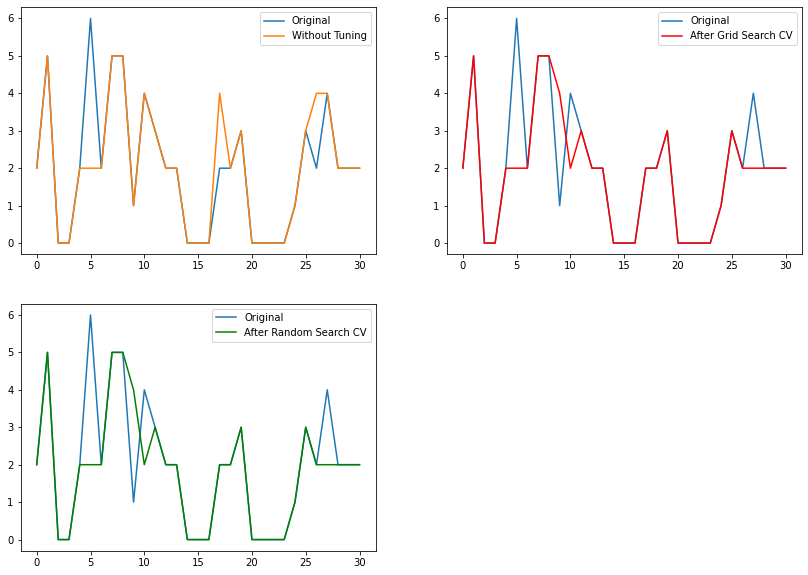

In [54]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(2,2,1)
plt.plot(range(len(y_test)),y_test,label='Original')
plt.plot(range(len(y_test)),y_pred_knn,label='Without Tuning')
plt.legend()
fig.add_subplot(2,2,2)
plt.plot(range(len(y_test)),y_test,label='Original')
plt.plot(range(len(y_test)),pred2,label='After Grid Search CV',c='r')
plt.legend()
fig.add_subplot(2,2,3)
plt.plot(range(len(y_test)),y_test,label='Original')
plt.plot(range(len(y_test)),pred3,label='After Random Search CV',c='g')
#plt.plot(range(len(y_test)),pred_rfr,label='Random Forest Regressor')
plt.legend()
plt.show()